In [4]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as sts
import scipy.stats as stats
import numpy as np
matplotlib.style.use('ggplot')
from scipy.stats import linregress
import scipy.stats as st
import sklearn.datasets as dta


In [5]:
# Read in Affinity, COVID-19, and GeoID Data
affinity_df = pd.read_csv('Data/Affinity-State-Daily.csv')
covid_df = pd.read_csv('Data/COVID_Cases-State-Daily.csv')
geoids_df = pd.read_csv('Data/GeoIDs-State.csv')
cases_df=pd.read_csv('Data/US_MAP_DATA (1).csv')

In [6]:
#affinity_dff.count()
#covid_df.count()
geoids_df.count()

statefips        51
statename        51
stateabbrev      51
state_pop2019    51
dtype: int64

In [7]:
# Create date column
affinity_df.dtypes

year                     int64
month                    int64
day                      int64
statefips                int64
spend_acf              float64
spend_aer              float64
spend_all              float64
spend_all_inchigh       object
spend_all_inclow        object
spend_all_incmiddle    float64
spend_apg              float64
spend_grf              float64
spend_hcs              float64
spend_tws              float64
dtype: object

In [8]:
affinity_date = pd.to_datetime(affinity_df[['year', 'month', 'day']])
affinity_date

0      2020-01-24
1      2020-01-24
2      2020-01-24
3      2020-01-24
4      2020-01-24
          ...    
7441   2020-06-17
7442   2020-06-17
7443   2020-06-17
7444   2020-06-17
7445   2020-06-17
Length: 7446, dtype: datetime64[ns]

In [9]:
affinity_df["date"] = affinity_date
affinity_df = affinity_df[ ['date'] + [ col for col in affinity_df.columns if col != 'date' ] ]
affinity_df

,date,year,month,day,statefips,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws
0,2020-01-24,2020,1,24,1,-0.000859,0.03580,0.00634,0.0219,0.000657,0.00687,-0.02130,0.00718,0.057000,-0.01760
1,2020-01-24,2020,1,24,2,0.007130,0.04920,-0.02640,-0.0106,.,-0.06990,0.15900,-0.03270,-0.154000,-0.07230
2,2020-01-24,2020,1,24,4,-0.009150,0.04490,-0.01260,-0.00749,-0.00918,-0.01670,-0.01190,-0.01160,0.020700,-0.04610
3,2020-01-24,2020,1,24,5,0.024400,-0.05270,-0.00707,0.0048,-0.00166,-0.01080,0.00842,-0.02800,0.005860,0.00444
4,2020-01-24,2020,1,24,6,0.004130,-0.00378,0.00813,0.00719,0.0124,0.00905,-0.01150,0.01610,0.020300,-0.00473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7441,2020-06-17,2020,6,17,51,-0.380000,-0.44500,-0.09680,-0.148,0.00955,-0.07610,-0.06580,0.04160,-0.166000,-0.53700
7442,2020-06-17,2020,6,17,53,-0.452000,-0.44700,-0.13100,-0.17,-0.162,-0.08700,-0.24200,0.04320,-0.223000,-0.49600
7443,2020-06-17,2020,6,17,54,-0.243000,-0.55300,0.00479,-0.0685,0.00212,0.01260,0.24000,0.05490,0.072500,-0.36200
7444,2020-06-17,2020,6,17,55,-0.375000,-0.42500,-0.09170,-0.1,-0.123,-0.08550,-0.03900,0.06040,-0.166000,-0.44700


In [10]:
covid_date = pd.to_datetime(covid_df[['year', 'month', 'day']])
covid_date

0      2020-01-21
1      2020-01-21
2      2020-01-21
3      2020-01-21
4      2020-01-21
          ...    
8920   2020-07-13
8921   2020-07-13
8922   2020-07-13
8923   2020-07-13
8924   2020-07-13
Length: 8925, dtype: datetime64[ns]

In [11]:
# add created date column to covid_df
covid_df["date"] = covid_date
covid_df = covid_df[ ['date'] + [ col for col in covid_df.columns if col != 'date' ] ]
covid_df

,date,year,month,day,statefips,case_rate,new_case_rate
0,2020-01-21,2020,1,21,1,0.0,.
1,2020-01-21,2020,1,21,2,0.0,.
2,2020-01-21,2020,1,21,4,0.0,.
3,2020-01-21,2020,1,21,5,0.0,.
4,2020-01-21,2020,1,21,6,0.0,.
...,...,...,...,...,...,...,...
8920,2020-07-13,2020,7,13,51,839.0,9.27
8921,2020-07-13,2020,7,13,53,572.0,9.42
8922,2020-07-13,2020,7,13,54,241.0,6.94
8923,2020-07-13,2020,7,13,55,697.0,13


In [12]:
# Merge covid and affinity dataframes
merge1_df = pd.merge(covid_df, affinity_df, on=["date", "statefips"], how="left")
merge1_df

,date,year_x,month_x,day_x,statefips,case_rate,new_case_rate,year_y,month_y,day_y,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws
0,2020-01-21,2020,1,21,1,0.0,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-21,2020,1,21,2,0.0,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-21,2020,1,21,4,0.0,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-21,2020,1,21,5,0.0,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-21,2020,1,21,6,0.0,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8920,2020-07-13,2020,7,13,51,839.0,9.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8921,2020-07-13,2020,7,13,53,572.0,9.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8922,2020-07-13,2020,7,13,54,241.0,6.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8923,2020-07-13,2020,7,13,55,697.0,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
merge1_df = merge1_df.dropna(how='any')
merge1_df

,date,year_x,month_x,day_x,statefips,case_rate,new_case_rate,year_y,month_y,day_y,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws
153,2020-01-24,2020,1,24,1,0.0,.,2020.0,1.0,24.0,-0.000859,0.03580,0.00634,0.0219,0.000657,0.00687,-0.02130,0.00718,0.057000,-0.01760
154,2020-01-24,2020,1,24,2,0.0,.,2020.0,1.0,24.0,0.007130,0.04920,-0.02640,-0.0106,.,-0.06990,0.15900,-0.03270,-0.154000,-0.07230
155,2020-01-24,2020,1,24,4,0.0,.,2020.0,1.0,24.0,-0.009150,0.04490,-0.01260,-0.00749,-0.00918,-0.01670,-0.01190,-0.01160,0.020700,-0.04610
156,2020-01-24,2020,1,24,5,0.0,.,2020.0,1.0,24.0,0.024400,-0.05270,-0.00707,0.0048,-0.00166,-0.01080,0.00842,-0.02800,0.005860,0.00444
157,2020-01-24,2020,1,24,6,0.0,.,2020.0,1.0,24.0,0.004130,-0.00378,0.00813,0.00719,0.0124,0.00905,-0.01150,0.01610,0.020300,-0.00473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7594,2020-06-17,2020,6,17,51,653.0,6.02,2020.0,6.0,17.0,-0.380000,-0.44500,-0.09680,-0.148,0.00955,-0.07610,-0.06580,0.04160,-0.166000,-0.53700
7595,2020-06-17,2020,6,17,53,371.0,4.37,2020.0,6.0,17.0,-0.452000,-0.44700,-0.13100,-0.17,-0.162,-0.08700,-0.24200,0.04320,-0.223000,-0.49600
7596,2020-06-17,2020,6,17,54,133.0,1.46,2020.0,6.0,17.0,-0.243000,-0.55300,0.00479,-0.0685,0.00212,0.01260,0.24000,0.05490,0.072500,-0.36200
7597,2020-06-17,2020,6,17,55,449.0,5.09,2020.0,6.0,17.0,-0.375000,-0.42500,-0.09170,-0.1,-0.123,-0.08550,-0.03900,0.06040,-0.166000,-0.44700


In [14]:
merge2_df = pd.merge(merge1_df, geoids_df, on="statefips", how="left")
del merge2_df['year_y']
del merge2_df['month_y']
del merge2_df['day_y']
merge2_df

,date,year_x,month_x,day_x,statefips,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,statename,stateabbrev,state_pop2019
0,2020-01-24,2020,1,24,1,0.0,.,-0.000859,0.03580,0.00634,0.0219,0.000657,0.00687,-0.02130,0.00718,0.057000,-0.01760,Alabama,AL,4903185
1,2020-01-24,2020,1,24,2,0.0,.,0.007130,0.04920,-0.02640,-0.0106,.,-0.06990,0.15900,-0.03270,-0.154000,-0.07230,Alaska,AK,731545
2,2020-01-24,2020,1,24,4,0.0,.,-0.009150,0.04490,-0.01260,-0.00749,-0.00918,-0.01670,-0.01190,-0.01160,0.020700,-0.04610,Arizona,AZ,7278717
3,2020-01-24,2020,1,24,5,0.0,.,0.024400,-0.05270,-0.00707,0.0048,-0.00166,-0.01080,0.00842,-0.02800,0.005860,0.00444,Arkansas,AR,3017804
4,2020-01-24,2020,1,24,6,0.0,.,0.004130,-0.00378,0.00813,0.00719,0.0124,0.00905,-0.01150,0.01610,0.020300,-0.00473,California,CA,39512223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7441,2020-06-17,2020,6,17,51,653.0,6.02,-0.380000,-0.44500,-0.09680,-0.148,0.00955,-0.07610,-0.06580,0.04160,-0.166000,-0.53700,Virginia,VA,8535519
7442,2020-06-17,2020,6,17,53,371.0,4.37,-0.452000,-0.44700,-0.13100,-0.17,-0.162,-0.08700,-0.24200,0.04320,-0.223000,-0.49600,Washington,WA,7614893
7443,2020-06-17,2020,6,17,54,133.0,1.46,-0.243000,-0.55300,0.00479,-0.0685,0.00212,0.01260,0.24000,0.05490,0.072500,-0.36200,West Virginia,WV,1792147
7444,2020-06-17,2020,6,17,55,449.0,5.09,-0.375000,-0.42500,-0.09170,-0.1,-0.123,-0.08550,-0.03900,0.06040,-0.166000,-0.44700,Wisconsin,WI,5822434


In [15]:
merge2_df = merge2_df.rename(columns={"year_x": "year", "month_x": "month", "day_x": "day"})
merge2_df

,date,year,month,day,statefips,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,statename,stateabbrev,state_pop2019
0,2020-01-24,2020,1,24,1,0.0,.,-0.000859,0.03580,0.00634,0.0219,0.000657,0.00687,-0.02130,0.00718,0.057000,-0.01760,Alabama,AL,4903185
1,2020-01-24,2020,1,24,2,0.0,.,0.007130,0.04920,-0.02640,-0.0106,.,-0.06990,0.15900,-0.03270,-0.154000,-0.07230,Alaska,AK,731545
2,2020-01-24,2020,1,24,4,0.0,.,-0.009150,0.04490,-0.01260,-0.00749,-0.00918,-0.01670,-0.01190,-0.01160,0.020700,-0.04610,Arizona,AZ,7278717
3,2020-01-24,2020,1,24,5,0.0,.,0.024400,-0.05270,-0.00707,0.0048,-0.00166,-0.01080,0.00842,-0.02800,0.005860,0.00444,Arkansas,AR,3017804
4,2020-01-24,2020,1,24,6,0.0,.,0.004130,-0.00378,0.00813,0.00719,0.0124,0.00905,-0.01150,0.01610,0.020300,-0.00473,California,CA,39512223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7441,2020-06-17,2020,6,17,51,653.0,6.02,-0.380000,-0.44500,-0.09680,-0.148,0.00955,-0.07610,-0.06580,0.04160,-0.166000,-0.53700,Virginia,VA,8535519
7442,2020-06-17,2020,6,17,53,371.0,4.37,-0.452000,-0.44700,-0.13100,-0.17,-0.162,-0.08700,-0.24200,0.04320,-0.223000,-0.49600,Washington,WA,7614893
7443,2020-06-17,2020,6,17,54,133.0,1.46,-0.243000,-0.55300,0.00479,-0.0685,0.00212,0.01260,0.24000,0.05490,0.072500,-0.36200,West Virginia,WV,1792147
7444,2020-06-17,2020,6,17,55,449.0,5.09,-0.375000,-0.42500,-0.09170,-0.1,-0.123,-0.08550,-0.03900,0.06040,-0.166000,-0.44700,Wisconsin,WI,5822434


In [16]:
jun17_df = merge2_df[merge2_df['date'] == '2020-06-17']
jun17_df.head()

,date,year,month,day,statefips,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,statename,stateabbrev,state_pop2019
7395,2020-06-17,2020,6,17,1,557.0,15.5,-0.210,-0.382,-0.0191,-0.11,0.00901,-0.0192,0.0529,0.0597,-0.1230,-0.456,Alabama,AL,4903185
7396,2020-06-17,2020,6,17,2,106.0,2.62,-0.308,-0.368,-0.1290,-0.128,.,-0.1380,0.0331,0.0104,-0.3390,-0.513,Alaska,AK,731545
7397,2020-06-17,2020,6,17,4,565.0,21.9,-0.402,-0.391,-0.1170,-0.13,-0.137,-0.1040,-0.1520,0.0532,-0.1300,-0.495,Arizona,AZ,7278717
7398,2020-06-17,2020,6,17,5,451.0,15.3,-0.245,-0.415,0.0145,-0.159,0.0192,0.0233,0.0752,0.0721,-0.0493,-0.542,Arkansas,AR,3017804
7399,2020-06-17,2020,6,17,6,413.0,8.4,-0.473,-0.603,-0.1790,-0.187,-0.172,-0.1650,-0.2250,0.0841,-0.1650,-0.580,California,CA,39512223


In [17]:
jun17_sorted = jun17_df.sort_values('case_rate',ascending = False)
top_five_states=jun17_sorted.iloc[0:5]
top_five_states_df=pd.DataFrame(top_five_states)
top_five_states_df

,date,year,month,day,statefips,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,statename,stateabbrev,state_pop2019
7427,2020-06-17,2020,6,17,36,2004.0,3.65,-0.420,-0.563,-0.0891,-0.127,-0.0501,-0.0603,-0.1630,0.0962,-0.217,-0.491,New York,NY,19453561
7425,2020-06-17,2020,6,17,34,1888.0,3.79,-0.414,-0.400,-0.0762,-0.107,-0.00771,-0.0377,-0.1850,0.1720,-0.168,-0.525,New Jersey,NJ,8882190
7416,2020-06-17,2020,6,17,25,1540.0,4.13,-0.408,-0.530,-0.0797,-0.108,-0.0259,-0.0254,0.0354,0.0994,-0.243,-0.520,Massachusetts,MA,6892503
7434,2020-06-17,2020,6,17,44,1530.0,6.16,-0.565,-0.420,-0.1980,-0.205,-0.161,-0.2040,-0.1180,0.0079,-0.216,-0.552,Rhode Island,RI,1059361
7403,2020-06-17,2020,6,17,11,1395.0,6.27,-0.569,-0.569,-0.2110,-0.243,-0.0304,-0.2030,-0.1380,0.2120,-0.224,-0.760,District Of Columbia,DC,705749


In [18]:
florida_df = jun17_df.loc[jun17_df["statename"] == "Florida"]
florida_df

,date,year,month,day,statefips,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,statename,stateabbrev,state_pop2019
7404,2020-06-17,2020,6,17,12,385.0,10.2,-0.245,-0.417,-0.0432,-0.0836,-0.0211,-0.0413,-0.0234,0.0641,-0.0424,-0.449,Florida,FL,21477737


In [19]:
top5_fl = top_five_states_df.append(florida_df, sort=False)
top5_fl

,date,year,month,day,statefips,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,statename,stateabbrev,state_pop2019
7427,2020-06-17,2020,6,17,36,2004.0,3.65,-0.420,-0.563,-0.0891,-0.127,-0.0501,-0.0603,-0.1630,0.0962,-0.2170,-0.491,New York,NY,19453561
7425,2020-06-17,2020,6,17,34,1888.0,3.79,-0.414,-0.400,-0.0762,-0.107,-0.00771,-0.0377,-0.1850,0.1720,-0.1680,-0.525,New Jersey,NJ,8882190
7416,2020-06-17,2020,6,17,25,1540.0,4.13,-0.408,-0.530,-0.0797,-0.108,-0.0259,-0.0254,0.0354,0.0994,-0.2430,-0.520,Massachusetts,MA,6892503
7434,2020-06-17,2020,6,17,44,1530.0,6.16,-0.565,-0.420,-0.1980,-0.205,-0.161,-0.2040,-0.1180,0.0079,-0.2160,-0.552,Rhode Island,RI,1059361
7403,2020-06-17,2020,6,17,11,1395.0,6.27,-0.569,-0.569,-0.2110,-0.243,-0.0304,-0.2030,-0.1380,0.2120,-0.2240,-0.760,District Of Columbia,DC,705749
7404,2020-06-17,2020,6,17,12,385.0,10.2,-0.245,-0.417,-0.0432,-0.0836,-0.0211,-0.0413,-0.0234,0.0641,-0.0424,-0.449,Florida,FL,21477737


In [20]:
top5_list=['New York','New Jersey','Massachusetts','Rhode Island','District Of Columbia','Florida']
top5_df = merge2_df[merge2_df['statename'].isin(top5_list)]
top5_df.head()

,date,year,month,day,statefips,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,statename,stateabbrev,state_pop2019
8,2020-01-24,2020,1,24,11,0.0,.,-0.00066,0.00528,-0.00252,0.00384,-0.0491,-0.00417,-0.04930,-0.00575,0.1290,0.01150,District Of Columbia,DC,705749
9,2020-01-24,2020,1,24,12,0.0,.,-0.01970,-0.04380,-0.01450,-0.0133,-0.0249,-0.01070,-0.00964,-0.01100,-0.0186,-0.00569,Florida,FL,21477737
21,2020-01-24,2020,1,24,25,0.0,.,0.02580,-0.04450,-0.00358,-0.00764,-0.0126,0.00507,0.03550,-0.03080,0.0485,-0.03790,Massachusetts,MA,6892503
30,2020-01-24,2020,1,24,34,0.0,.,-0.00736,0.01600,-0.00548,-0.00759,0.00563,-0.00414,-0.00722,-0.02020,-0.0451,0.00592,New Jersey,NJ,8882190
32,2020-01-24,2020,1,24,36,0.0,.,0.00214,-0.03430,-0.00610,-0.00332,0.00127,-0.01040,0.01430,-0.02250,-0.0316,0.06060,New York,NY,19453561


In [135]:

eom_df =top5_df[top5_df['date'].isin(['2020-01-31', '2020-02-28', '2020-03-31','2020-04-30','2020-05-31','2020-06-17'])]
eom_df.head()

,date,year,month,day,statefips,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,statename,stateabbrev,state_pop2019
365,2020-01-31,2020,1,31,11,0.0,0,-0.0608,0.011300,-0.01250,-0.0225,-0.0227,0.04720,-0.01470,-0.00464,0.01430,0.0490,District Of Columbia,DC,705749
366,2020-01-31,2020,1,31,12,0.0,0,0.0140,0.032300,0.00720,-0.0024,0.0217,0.00407,0.02200,0.01750,-0.01230,-0.0305,Florida,FL,21477737
378,2020-01-31,2020,1,31,25,0.0,0,-0.0325,-0.001670,-0.03080,-0.0304,0.092,-0.04090,-0.02830,-0.01440,-0.05370,-0.0499,Massachusetts,MA,6892503
387,2020-01-31,2020,1,31,34,0.0,0,-0.0157,-0.030100,-0.01810,-0.0144,-0.0276,-0.02280,-0.01350,-0.01490,-0.02610,-0.0264,New Jersey,NJ,8882190
389,2020-01-31,2020,1,31,36,0.0,0,-0.0174,-0.000033,-0.00905,-0.0114,-0.00278,-0.00765,-0.00141,-0.01020,-0.00843,-0.0343,New York,NY,19453561


## Covid-19 Cases (%) by State as of June 17,2020

In [22]:
# Heatmap of Covid-19 Cases Rate by State as of June 17,2020
#Configure gmaps
gmaps.configure(api_key=g_key)


NameError: name 'gmaps' is not defined

In [23]:
cases_df.head()

,abbr,fips,jurisdiction,Total Cases,Total Death,Death_100k,CasesInLast7Days,RatePer100000
0,AK,2,Alaska,1949,18,2.4,410,264.3
1,AL,1,Alabama,68950,1292,26.4,13360,1410.6
2,AR,5,Arkansas,33927,363,12.0,4988,1125.7
3,AS,60,American Samoa,0,0,NaN,0,0.0
4,AZ,4,Arizona,145183,2784,38.8,21359,2024.4


In [24]:
cases_df = cases_df.rename(columns={"abbr": "stateabbrev"})
cases_df.head()

,stateabbrev,fips,jurisdiction,Total Cases,Total Death,Death_100k,CasesInLast7Days,RatePer100000
0,AK,2,Alaska,1949,18,2.4,410,264.3
1,AL,1,Alabama,68950,1292,26.4,13360,1410.6
2,AR,5,Arkansas,33927,363,12.0,4988,1125.7
3,AS,60,American Samoa,0,0,NaN,0,0.0
4,AZ,4,Arizona,145183,2784,38.8,21359,2024.4


In [25]:
abr_top5_list=['NY','NJ','MA','RI','DC','FL']
abr_top5_df = cases_df[cases_df['stateabbrev'].isin(abr_top5_list)]
abr_top5_df

,stateabbrev,fips,jurisdiction,Total Cases,Total Death,Death_100k,CasesInLast7Days,RatePer100000
8,DC,11,District of Columbia,11339,579,82.4,433,1614.2
10,FL,12,Florida,355899,5072,23.8,77232,1670.9
21,MA,25,Massachusetts,113789,8433,122.2,1962,1648.6
34,NJ,34,New Jersey,176963,15715,176.4,1441,1986.4
37,NY,36,New York,185623,8792,78.9,2661,1665.8
45,RI,44,Rhode Island,17904,995,94.1,417,1693.3


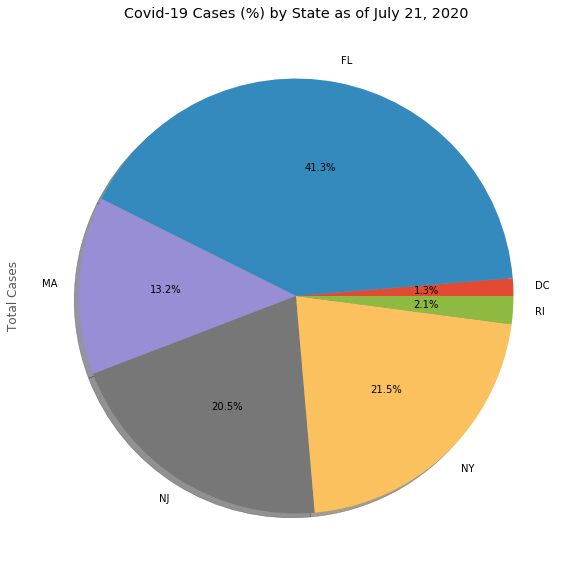

In [26]:

by_state=abr_top5_df.groupby('stateabbrev').mean()
by_state

# Generate a pie plot showing the distribution of Covid-19 Cases (%) by State
pie_plot=by_state.plot.pie(y="Total Cases",title="Covid-19 Cases (%) by State as of July 21, 2020",
autopct='%1.1f%%',figsize=(10,10),shadow=True,legend=False)


In [27]:
reduced_top5_fl = top5_fl.loc[:,["case_rate", "statename", "state_pop2019"]]
#state_groupby=reduced_eom.groupby("statename")
reduced_top5_fl=pd.DataFrame(reduced_top5_fl)
reduced_top5_fl["Cases"]=(reduced_top5_fl.case_rate * reduced_top5_fl.state_pop2019)
reduced_top5_fl['Cases'].round(decimals=2)
reduced_top5_fl
#state=state_groupby["case_rate"]]*[state_groupby["state_pop2019"]]

#cases = round()
#training_df["Membership (Weeks)"] = weeks

#training_df.head()

,case_rate,statename,state_pop2019,Cases
7427,2004.0,New York,19453561,3.898494e+10
7425,1888.0,New Jersey,8882190,1.676957e+10
7416,1540.0,Massachusetts,6892503,1.061445e+10
7434,1530.0,Rhode Island,1059361,1.620822e+09
7403,1395.0,District Of Columbia,705749,9.845199e+08
7404,385.0,Florida,21477737,8.268929e+09


## Covid-19 Relationship with Consumer Spending Behavior

The Pearson r correlation for Covid-19 case rate and average Consumer Spending Consumer Spending -0.19
The Spearman r correlation for Covid-19 case rate and average Consumer Spending Consumer Spending -0.09
The r-squared is: 0.036510832034930316


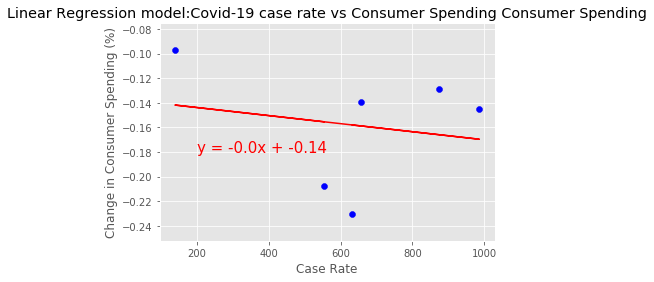

In [150]:
by_st_abbrev=eom_df.groupby(["stateabbrev"]).mean()
by_st_abbrev
#Scatter Plot, Correlation and Regression
x_values = by_st_abbrev['case_rate']
y_values = by_st_abbrev['spend_all']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(200,-0.18),fontsize=15,color="red")
plt.title('Linear Regression model:Covid-19 case rate vs Consumer Spending Consumer Spending')
plt.xlabel('Case Rate')
plt.ylabel('Change in Consumer Spending (%)')
correlation_p = st.pearsonr( by_st_abbrev['case_rate'],by_st_abbrev['spend_all'])
correlation_s = stats.spearmanr(by_st_abbrev['case_rate'], by_st_abbrev['spend_all'])
print(f"The Pearson r correlation for Covid-19 case rate and average Consumer Spending Consumer Spending {round(correlation_p[0],2)}")
print(f"The Spearman r correlation for Covid-19 case rate and average Consumer Spending Consumer Spending {round(correlation_s[0],2)}")
print(f"The r-squared is: {rvalue**2}")

The correlation for Covid-19 case rate and average Consumer Spending Consumer Spending -0.45
The r-squared is: 0.2041240698249281


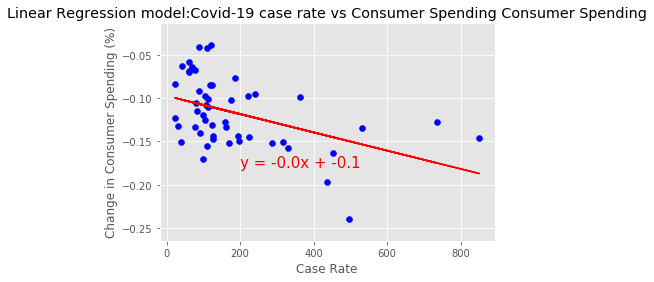

In [151]:
by_st_abbrev=merge2_df.groupby(["stateabbrev"]).mean()
by_st_abbrev
#Scatter Plot Correlation and Regression
x_values = by_st_abbrev['case_rate']
y_values = by_st_abbrev['spend_all']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="blue")
plt.plot(x_values,regress_values,"r-") 
plt.annotate(line_eq,(200,-0.18),fontsize=15,color="red")
plt.title('Linear Regression model:Covid-19 case rate vs Consumer Spending Consumer Spending')
plt.xlabel('Case Rate')
plt.ylabel('Change in Consumer Spending (%)')
correlation = st.pearsonr( by_st_abbrev['case_rate'],by_st_abbrev['spend_all'])
print(f"The correlation for Covid-19 case rate and average Consumer Spending Consumer Spending {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")

# Consumer Spending Analysis for the top 5 States with Covid 19 and Florida
## New York, New Jersey, Massachusetts, Rhode Island, District Of Columbia, Florida

In [152]:
eom_reduced = eom_df.loc[:,["case_rate", "statename", "month","spend_all"]]
eom_reduced=pd.DataFrame(eom_reduced )
eom_reduced.head()

,case_rate,statename,month,spend_all
365,0.0,District Of Columbia,1,-0.01250
366,0.0,Florida,1,0.00720
378,0.0,Massachusetts,1,-0.03080
387,0.0,New Jersey,1,-0.01810
389,0.0,New York,1,-0.00905


In [153]:
by_month=eom_reduced.groupby('month').mean()
by_month_df=pd.DataFrame(by_month)
by_month_df

,case_rate,spend_all
month,,
1,0.000000,-0.019508
2,0.002417,-0.029467
3,140.933333,-0.365667
4,902.500000,-0.251667
5,1343.500000,-0.167200
6,1457.000000,-0.116200


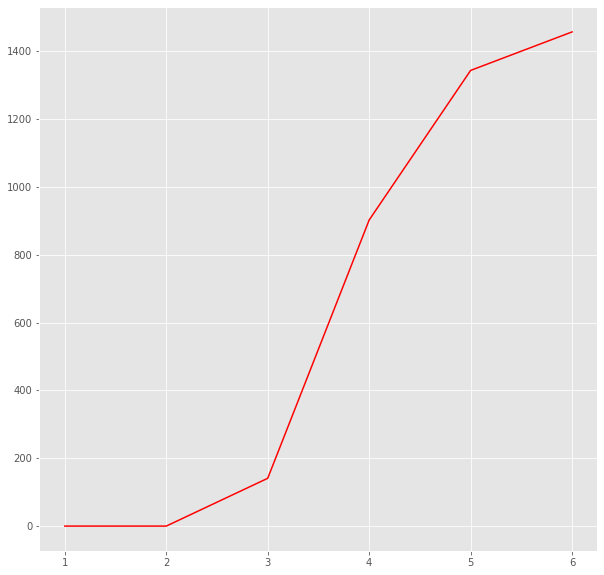

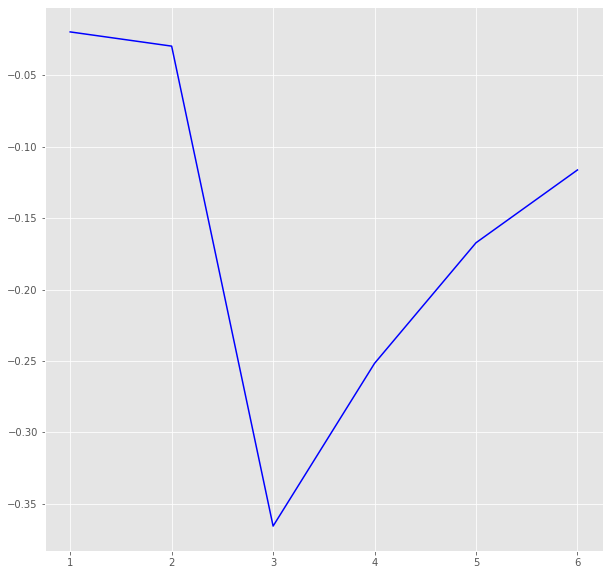

In [211]:
plt.figure(figsize=(10,10))
plt.plot(by_month_df['case_rate'], color="red")

by_month=eom_reduced.groupby('month').mean()
by_month_df=pd.DataFrame(by_month)
by_month_df
#eom_df['case_rate'].plot()
plt.figure(figsize=(10,10))
plt.plot(by_month_df['spend_all'],color="blue")


<Figure size 720x720 with 0 Axes>

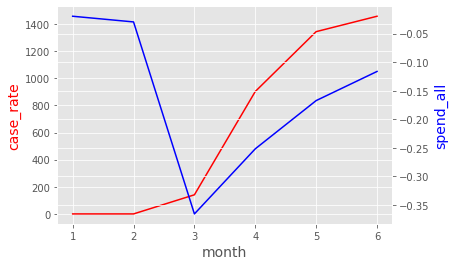

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [225]:

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(by_month_df['case_rate'], color="red")
# set x-axis label
plt.figure(figsize=(10,10))
ax.set_xlabel("month",fontsize=14)
# set y-axis label
ax.set_ylabel("case_rate",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(by_month_df['spend_all'],color="blue")
ax2.set_ylabel("spend_all",color="blue",fontsize=14)
plt.show()
# save the plot as a file
fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

In [156]:
#Calculate central tendency measures for Change in Consumer Spending % by State
top5_df.groupby("statename").agg(['mean','median','var','std','sem','min','max'])["spend_all"]


,mean,median,var,std,sem,min,max
statename,,,,,,,
District Of Columbia,-0.196942,-0.26650,0.022849,0.151158,0.012510,-0.398,0.0505
Florida,-0.097488,-0.07905,0.007665,0.087550,0.007246,-0.305,0.0072
Massachusetts,-0.135034,-0.12450,0.015233,0.123422,0.010214,-0.402,0.0444
New Jersey,-0.128106,-0.12100,0.013503,0.116200,0.009617,-0.372,0.0209
New York,-0.145591,-0.14700,0.013735,0.117196,0.009699,-0.376,0.0118
Rhode Island,-0.239449,-0.27300,0.022714,0.150711,0.012473,-0.483,0.0198


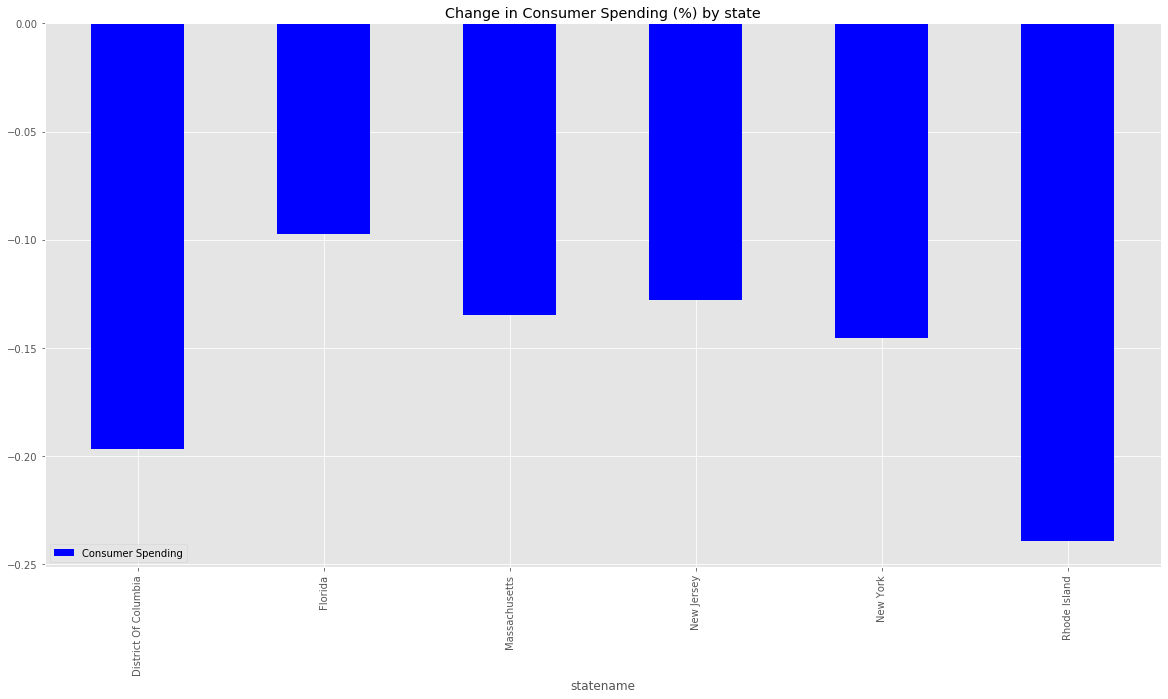

In [217]:
# Generate a bar plot showing the change in consumer spending rate by State. 
state_spending=top5_df.groupby(["statename"]).mean()["spend_all"]

df=pd.DataFrame({"Consumer Spending":(state_spending)})
df
bar_plot=df.plot.bar( y="Consumer Spending",title="Change in Consumer Spending (%) by state",color="blue",legend=True,figsize=(20, 10))
#rot=90,

In [158]:
reduced_top5_df = top5_df.loc[:,["date", "year", "month", "day", "statefips", "statename","stateabbrev", "case_rate","spend_acf",
                                   "spend_aer","spend_apg","spend_grf","spend_hcs","spend_tws"]]
reduced_top5_df.head()

,date,year,month,day,statefips,statename,stateabbrev,case_rate,spend_acf,spend_aer,spend_apg,spend_grf,spend_hcs,spend_tws
8,2020-01-24,2020,1,24,11,District Of Columbia,DC,0.0,-0.00066,0.00528,-0.04930,-0.00575,0.1290,0.01150
9,2020-01-24,2020,1,24,12,Florida,FL,0.0,-0.01970,-0.04380,-0.00964,-0.01100,-0.0186,-0.00569
21,2020-01-24,2020,1,24,25,Massachusetts,MA,0.0,0.02580,-0.04450,0.03550,-0.03080,0.0485,-0.03790
30,2020-01-24,2020,1,24,34,New Jersey,NJ,0.0,-0.00736,0.01600,-0.00722,-0.02020,-0.0451,0.00592
32,2020-01-24,2020,1,24,36,New York,NY,0.0,0.00214,-0.03430,0.01430,-0.02250,-0.0316,0.06060


In [159]:
# Set the 'stateabbrev' to be our index for easy referencing of rows
top5 = reduced_top5_df.set_index("stateabbrev")
top5.head()

,date,year,month,day,statefips,statename,case_rate,spend_acf,spend_aer,spend_apg,spend_grf,spend_hcs,spend_tws
stateabbrev,,,,,,,,,,,,,
DC,2020-01-24,2020,1,24,11,District Of Columbia,0.0,-0.00066,0.00528,-0.04930,-0.00575,0.1290,0.01150
FL,2020-01-24,2020,1,24,12,Florida,0.0,-0.01970,-0.04380,-0.00964,-0.01100,-0.0186,-0.00569
MA,2020-01-24,2020,1,24,25,Massachusetts,0.0,0.02580,-0.04450,0.03550,-0.03080,0.0485,-0.03790
NJ,2020-01-24,2020,1,24,34,New Jersey,0.0,-0.00736,0.01600,-0.00722,-0.02020,-0.0451,0.00592
NY,2020-01-24,2020,1,24,36,New York,0.0,0.00214,-0.03430,0.01430,-0.02250,-0.0316,0.06060


In [160]:
top5_df_daterange = top5_df[(reduced_top5_date['date'] >= '2020-01-24') & (reduced_top5_date['date'] <= '2020-06-17')]
top5_df_daterange.head()

,date,year,month,day,statefips,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,statename,stateabbrev,state_pop2019
8,2020-01-24,2020,1,24,11,0.0,.,-0.00066,0.00528,-0.00252,0.00384,-0.0491,-0.00417,-0.04930,-0.00575,0.1290,0.01150,District Of Columbia,DC,705749
9,2020-01-24,2020,1,24,12,0.0,.,-0.01970,-0.04380,-0.01450,-0.0133,-0.0249,-0.01070,-0.00964,-0.01100,-0.0186,-0.00569,Florida,FL,21477737
21,2020-01-24,2020,1,24,25,0.0,.,0.02580,-0.04450,-0.00358,-0.00764,-0.0126,0.00507,0.03550,-0.03080,0.0485,-0.03790,Massachusetts,MA,6892503
30,2020-01-24,2020,1,24,34,0.0,.,-0.00736,0.01600,-0.00548,-0.00759,0.00563,-0.00414,-0.00722,-0.02020,-0.0451,0.00592,New Jersey,NJ,8882190
32,2020-01-24,2020,1,24,36,0.0,.,0.00214,-0.03430,-0.00610,-0.00332,0.00127,-0.01040,0.01430,-0.02250,-0.0316,0.06060,New York,NY,19453561


In [161]:
reduced_top5_date = top5_df_daterange[["date","spend_acf","spend_aer","spend_apg","spend_grf","spend_hcs","spend_tws"]]
reduced_top5_date.head()

,date,spend_acf,spend_aer,spend_apg,spend_grf,spend_hcs,spend_tws
8,2020-01-24,-0.00066,0.00528,-0.04930,-0.00575,0.1290,0.01150
9,2020-01-24,-0.01970,-0.04380,-0.00964,-0.01100,-0.0186,-0.00569
21,2020-01-24,0.02580,-0.04450,0.03550,-0.03080,0.0485,-0.03790
30,2020-01-24,-0.00736,0.01600,-0.00722,-0.02020,-0.0451,0.00592
32,2020-01-24,0.00214,-0.03430,0.01430,-0.02250,-0.0316,0.06060


In [162]:
by_date_5_df = reduced_top5_date.set_index("date")
by_date_5_df.head()

,spend_acf,spend_aer,spend_apg,spend_grf,spend_hcs,spend_tws
date,,,,,,
2020-01-24,-0.00066,0.00528,-0.04930,-0.00575,0.1290,0.01150
2020-01-24,-0.01970,-0.04380,-0.00964,-0.01100,-0.0186,-0.00569
2020-01-24,0.02580,-0.04450,0.03550,-0.03080,0.0485,-0.03790
2020-01-24,-0.00736,0.01600,-0.00722,-0.02020,-0.0451,0.00592
2020-01-24,0.00214,-0.03430,0.01430,-0.02250,-0.0316,0.06060


In [163]:
dates = reduced_top5_date['date'].unique()

In [164]:
eom_df =top5_df[top5_df['date'].isin(['2020-01-31', '2020-02-28', '2020-03-31','2020-04-30','2020-05-31','2020-06-17'])]
eom_df.head()

,date,year,month,day,statefips,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,statename,stateabbrev,state_pop2019
365,2020-01-31,2020,1,31,11,0.0,0,-0.0608,0.011300,-0.01250,-0.0225,-0.0227,0.04720,-0.01470,-0.00464,0.01430,0.0490,District Of Columbia,DC,705749
366,2020-01-31,2020,1,31,12,0.0,0,0.0140,0.032300,0.00720,-0.0024,0.0217,0.00407,0.02200,0.01750,-0.01230,-0.0305,Florida,FL,21477737
378,2020-01-31,2020,1,31,25,0.0,0,-0.0325,-0.001670,-0.03080,-0.0304,0.092,-0.04090,-0.02830,-0.01440,-0.05370,-0.0499,Massachusetts,MA,6892503
387,2020-01-31,2020,1,31,34,0.0,0,-0.0157,-0.030100,-0.01810,-0.0144,-0.0276,-0.02280,-0.01350,-0.01490,-0.02610,-0.0264,New Jersey,NJ,8882190
389,2020-01-31,2020,1,31,36,0.0,0,-0.0174,-0.000033,-0.00905,-0.0114,-0.00278,-0.00765,-0.00141,-0.01020,-0.00843,-0.0343,New York,NY,19453561


In [165]:
eom_df
by_month2=eom_df.groupby('month').mean()
by_month_df2=pd.DataFrame(by_month2)
by_month_df2

,year,day,statefips,case_rate,spend_acf,spend_aer,spend_all,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,state_pop2019
month,,,,,,,,,,,,,
1,2020.0,31.0,27.0,0.000000,-0.039067,-0.018534,-0.019508,-0.004953,-0.004168,-0.00689,-0.041705,0.013150,9745183.5
2,2020.0,28.0,27.0,0.002417,-0.068167,-0.108183,-0.029467,-0.039578,-0.024033,0.03176,-0.014617,-0.105617,9745183.5
3,2020.0,31.0,27.0,140.933333,-0.704000,-0.742500,-0.365667,-0.342833,-0.523667,0.10160,-0.645167,-0.725000,9745183.5
4,2020.0,30.0,27.0,902.500000,-0.628833,-0.785833,-0.251667,-0.225333,-0.345000,0.19870,-0.589500,-0.727500,9745183.5
5,2020.0,31.0,27.0,1343.500000,-0.504333,-0.614500,-0.167200,-0.157133,-0.203000,0.11565,-0.343000,-0.624000,9745183.5
6,2020.0,17.0,27.0,1457.000000,-0.436833,-0.483167,-0.116200,-0.095283,-0.098667,0.10860,-0.185067,-0.549500,9745183.5


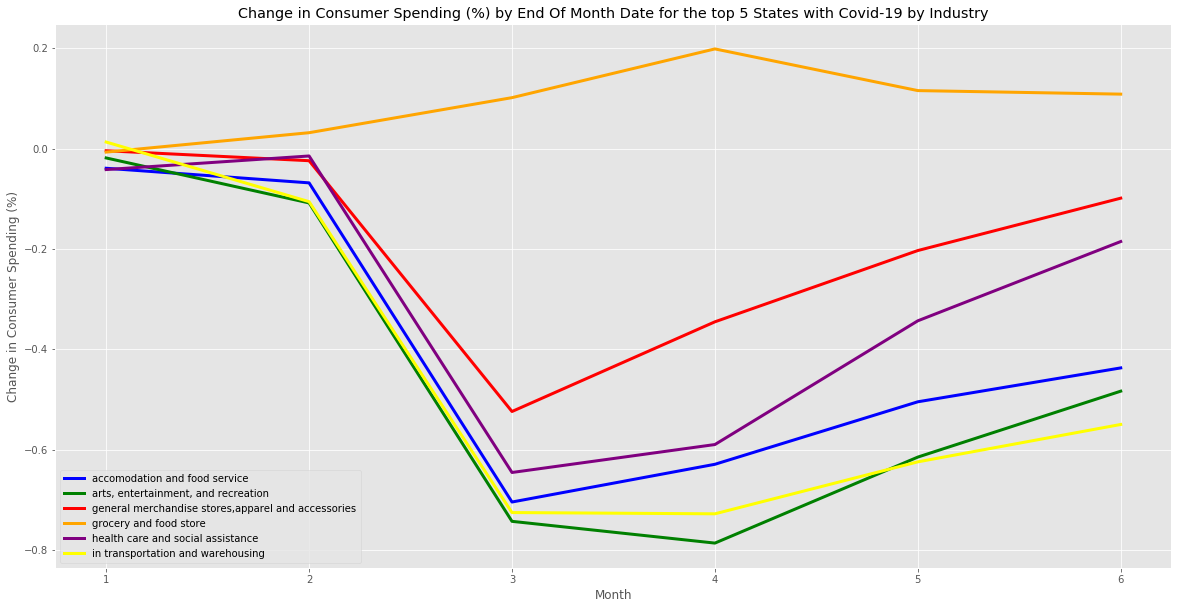

In [166]:
plt.figure(figsize=(20,10))


acf,= plt.plot(by_month_df2['spend_acf'],color="blue", label='accomodation and food service', linewidth=3.0)
aer,= plt.plot(by_month_df2['spend_aer'],color="green", label="arts, entertainment, and recreation ", linewidth=3.0)
apg,= plt.plot(by_month_df2['spend_apg'],color="red", label="general merchandise stores,apparel and accessories", linewidth=3.0)
grf,= plt.plot(by_month_df2['spend_grf'],color="orange", label="grocery and food store", linewidth=3.0)
hcs,= plt.plot(by_month_df2['spend_hcs'],color="purple", label="health care and social assistance", linewidth=3.0 )
tws,= plt.plot(by_month_df2['spend_tws'],color="yellow", label="in transportation and warehousing", linewidth=3.0 )
# Create a legend for our chart
plt.legend(handles=[acf,aer,apg,grf,hcs,tws], loc="lower left")
plt.xlabel('Month')
# Set the y axis label of the current axis.
plt.ylabel('Change in Consumer Spending (%)')
#plt.xticks(np.arange(min(by_month_df2["month"]), max(by_month_df2["month"])+1, 1.0))
# Set a title of the current axes.
plt.title('Change in Consumer Spending (%) by End Of Month Date for the top 5 States with Covid-19 by Industry')
# Show the chart
plt.show()
#spend_aer,

In [167]:
eom_df = top5[top5['date'].isin(['2020-01-31', '2020-02-28', '2020-03-31','2020-04-30','2020-05-31','2020-06-17'])]
eom_df.head()

,date,year,month,day,statefips,statename,case_rate,spend_acf,spend_aer,spend_apg,spend_grf,spend_hcs,spend_tws
stateabbrev,,,,,,,,,,,,,
DC,2020-01-31,2020,1,31,11,District Of Columbia,0.0,-0.0608,0.011300,-0.01470,-0.00464,0.01430,0.0490
FL,2020-01-31,2020,1,31,12,Florida,0.0,0.0140,0.032300,0.02200,0.01750,-0.01230,-0.0305
MA,2020-01-31,2020,1,31,25,Massachusetts,0.0,-0.0325,-0.001670,-0.02830,-0.01440,-0.05370,-0.0499
NJ,2020-01-31,2020,1,31,34,New Jersey,0.0,-0.0157,-0.030100,-0.01350,-0.01490,-0.02610,-0.0264
NY,2020-01-31,2020,1,31,36,New York,0.0,-0.0174,-0.000033,-0.00141,-0.01020,-0.00843,-0.0343


In [168]:
by_date_range = top5[(top5['date'] >= '2020-01-24') & (top5['date'] <= '2020-06-17')]
by_date_range.head()

,date,year,month,day,statefips,statename,case_rate,spend_acf,spend_aer,spend_apg,spend_grf,spend_hcs,spend_tws
stateabbrev,,,,,,,,,,,,,
DC,2020-01-24,2020,1,24,11,District Of Columbia,0.0,-0.00066,0.00528,-0.04930,-0.00575,0.1290,0.01150
FL,2020-01-24,2020,1,24,12,Florida,0.0,-0.01970,-0.04380,-0.00964,-0.01100,-0.0186,-0.00569
MA,2020-01-24,2020,1,24,25,Massachusetts,0.0,0.02580,-0.04450,0.03550,-0.03080,0.0485,-0.03790
NJ,2020-01-24,2020,1,24,34,New Jersey,0.0,-0.00736,0.01600,-0.00722,-0.02020,-0.0451,0.00592
NY,2020-01-24,2020,1,24,36,New York,0.0,0.00214,-0.03430,0.01430,-0.02250,-0.0316,0.06060


In [169]:
by_industry_plot_df = by_date_range[["date","month", "case_rate","spend_acf","spend_aer","spend_apg","spend_grf","spend_hcs","spend_tws"]]
by_industry_plot_df.head()

,date,month,case_rate,spend_acf,spend_aer,spend_apg,spend_grf,spend_hcs,spend_tws
stateabbrev,,,,,,,,,
DC,2020-01-24,1,0.0,-0.00066,0.00528,-0.04930,-0.00575,0.1290,0.01150
FL,2020-01-24,1,0.0,-0.01970,-0.04380,-0.00964,-0.01100,-0.0186,-0.00569
MA,2020-01-24,1,0.0,0.02580,-0.04450,0.03550,-0.03080,0.0485,-0.03790
NJ,2020-01-24,1,0.0,-0.00736,0.01600,-0.00722,-0.02020,-0.0451,0.00592
NY,2020-01-24,1,0.0,0.00214,-0.03430,0.01430,-0.02250,-0.0316,0.06060


In [170]:
by_industry_plot_df = by_industry_plot_df.set_index("date")
by_industry_plot_df.head()

,month,case_rate,spend_acf,spend_aer,spend_apg,spend_grf,spend_hcs,spend_tws
date,,,,,,,,
2020-01-24,1,0.0,-0.00066,0.00528,-0.04930,-0.00575,0.1290,0.01150
2020-01-24,1,0.0,-0.01970,-0.04380,-0.00964,-0.01100,-0.0186,-0.00569
2020-01-24,1,0.0,0.02580,-0.04450,0.03550,-0.03080,0.0485,-0.03790
2020-01-24,1,0.0,-0.00736,0.01600,-0.00722,-0.02020,-0.0451,0.00592
2020-01-24,1,0.0,0.00214,-0.03430,0.01430,-0.02250,-0.0316,0.06060


In [171]:
# Create a list of the dates to use for the x axis
dates =by_date_range['date'].unique()


In [186]:
NY = eom_df.loc[eom_df.index == "NY", :]
NY.head()

,date,year,month,day,statefips,statename,case_rate,spend_acf,spend_aer,spend_apg,spend_grf,spend_hcs,spend_tws
stateabbrev,,,,,,,,,,,,,
NY,2020-01-31,2020,1,31,36,New York,0.0,-0.0174,-0.000033,-0.00141,-0.01020,-0.00843,-0.0343
NY,2020-02-28,2020,2,28,36,New York,0.0,-0.0806,-0.090800,-0.01770,0.00921,-0.04750,-0.0873
NY,2020-03-31,2020,3,31,36,New York,392.0,-0.6980,-0.772000,-0.56200,0.07700,-0.65100,-0.7250
NY,2020-04-30,2020,4,30,36,New York,1592.0,-0.6150,-0.801000,-0.36200,0.20600,-0.58600,-0.7170
NY,2020-05-31,2020,5,31,36,New York,1931.0,-0.4940,-0.629000,-0.27700,0.15300,-0.47500,-0.5960


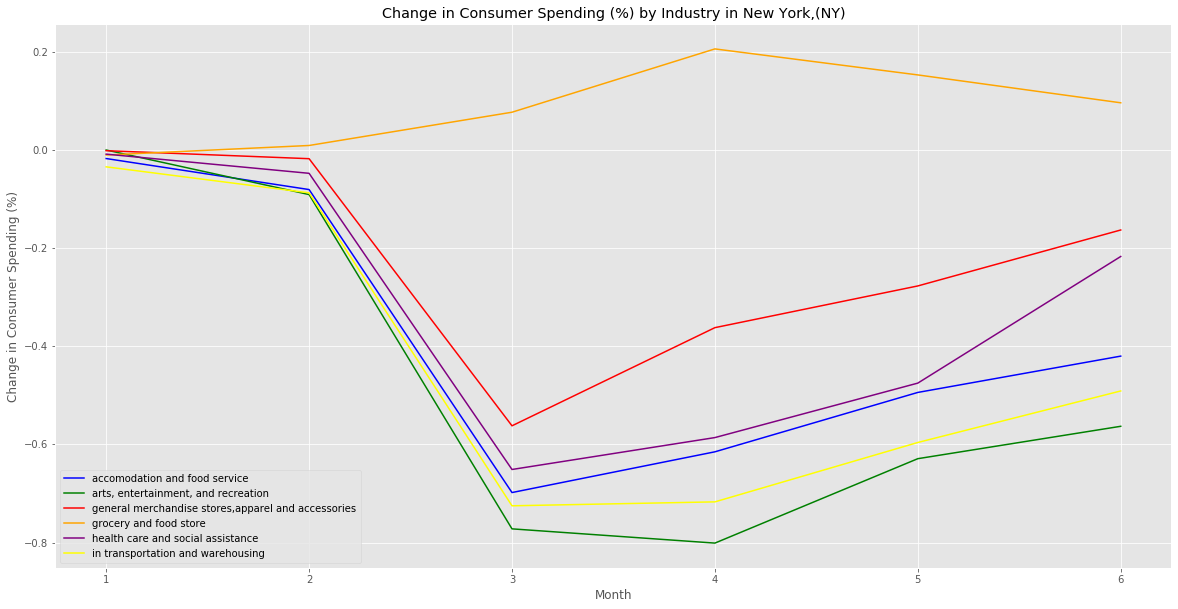

In [199]:
plt.figure(figsize=(20,10))
spend_acf, = plt.plot(NY["month"],NY["spend_acf"], color="blue", label="accomodation and food service" )
spend_aer, = plt.plot(NY["month"],NY["spend_aer"], color="green", label="arts, entertainment, and recreation " )
spend_apg, = plt.plot(NY["month"],NY["spend_apg"], color="red", label="general merchandise stores,apparel and accessories" )
spend_grf, = plt.plot(NY["month"],NY["spend_grf"], color="orange", label="grocery and food store" )
spend_hcs, = plt.plot(NY["month"],NY["spend_hcs"], color="purple", label="health care and social assistance" )
spend_tws, = plt.plot(NY["month"],NY["spend_tws"], color="yellow", label="in transportation and warehousing" )
# Create a legend for our chart
plt.legend(handles=[spend_acf, spend_aer, spend_apg,spend_grf,spend_hcs,spend_tws], loc="lower left")
plt.xlabel('Month')
# Set the y axis label of the current axis.
plt.ylabel('Change in Consumer Spending (%)')
# Set a title of the current axes.
plt.xticks(np.arange(min(eom_df["month"]), max(eom_df["month"])+1, 1.0))
plt.title('Change in Consumer Spending (%) by Industry in New York,(NY)')
# Show the chart
plt.show()

In [188]:
NJ = eom_df.loc[eom_df.index == "NJ", :]
NJ.head()

,date,year,month,day,statefips,statename,case_rate,spend_acf,spend_aer,spend_apg,spend_grf,spend_hcs,spend_tws
stateabbrev,,,,,,,,,,,,,
NJ,2020-01-31,2020,1,31,34,New Jersey,0.0,-0.0157,-0.0301,-0.0135,-0.0149,-0.0261,-0.0264
NJ,2020-02-28,2020,2,28,34,New Jersey,0.0,-0.0412,-0.0633,-0.0303,0.0207,0.0208,-0.0847
NJ,2020-03-31,2020,3,31,34,New Jersey,210.0,-0.6830,-0.6590,-0.5580,0.0866,-0.5970,-0.7030
NJ,2020-04-30,2020,4,30,34,New Jersey,1336.0,-0.6150,-0.6380,-0.3650,0.2680,-0.5330,-0.7120
NJ,2020-05-31,2020,5,31,34,New Jersey,1806.0,-0.4630,-0.4290,-0.2430,0.1860,-0.3060,-0.6060


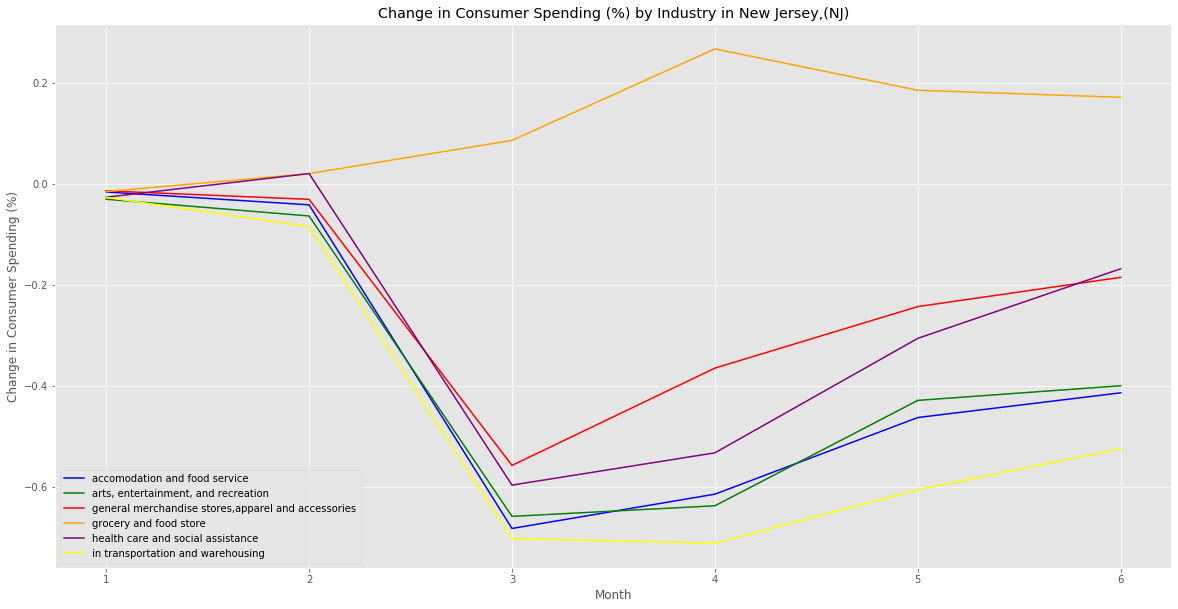

In [200]:
plt.figure(figsize=(20,10))
spend_acf, = plt.plot(NJ["month"],NJ["spend_acf"], color="blue", label="accomodation and food service" )
spend_aer, = plt.plot(NJ["month"],NJ["spend_aer"], color="green", label="arts, entertainment, and recreation " )
spend_apg, = plt.plot(NJ["month"],NJ["spend_apg"], color="red", label="general merchandise stores,apparel and accessories" )
spend_grf, = plt.plot(NJ["month"],NJ["spend_grf"], color="orange", label="grocery and food store" )
spend_hcs, = plt.plot(NJ["month"],NJ["spend_hcs"], color="purple", label="health care and social assistance" )
spend_tws, = plt.plot(NJ["month"],NJ["spend_tws"], color="yellow", label="in transportation and warehousing" )
# Create a legend for our chart
plt.legend(handles=[spend_acf, spend_aer, spend_apg,spend_grf,spend_hcs,spend_tws], loc="lower left")
plt.xlabel('Month')
# Set the y axis label of the current axis.
plt.ylabel('Change in Consumer Spending (%)')
plt.xticks(np.arange(min(eom_df["month"]), max(eom_df["month"])+1, 1.0))
# Set a title of the current axes.
plt.title('Change in Consumer Spending (%) by Industry in New Jersey,(NJ)')
# Show the chart
plt.show()

In [190]:
# Filter the data so that only those sightings in the MA are in a DataFrame
MA = eom_df.loc[eom_df.index == "MA", :]
MA.head()

,date,year,month,day,statefips,statename,case_rate,spend_acf,spend_aer,spend_apg,spend_grf,spend_hcs,spend_tws
stateabbrev,,,,,,,,,,,,,
MA,2020-01-31,2020,1,31,25,Massachusetts,0.0000,-0.0325,-0.00167,-0.0283,-0.0144,-0.0537,-0.0499
MA,2020-02-28,2020,2,28,25,Massachusetts,0.0145,-0.0757,-0.12300,0.0329,0.0546,0.0802,-0.0750
MA,2020-03-31,2020,3,31,25,Massachusetts,96.0000,-0.6980,-0.79900,-0.5440,0.0679,-0.6560,-0.7590
MA,2020-04-30,2020,4,30,25,Massachusetts,903.0000,-0.5840,-0.77200,-0.2930,0.2400,-0.5700,-0.7030
MA,2020-05-31,2020,5,31,25,Massachusetts,1407.0000,-0.4860,-0.55900,-0.1650,0.1920,-0.4350,-0.6030


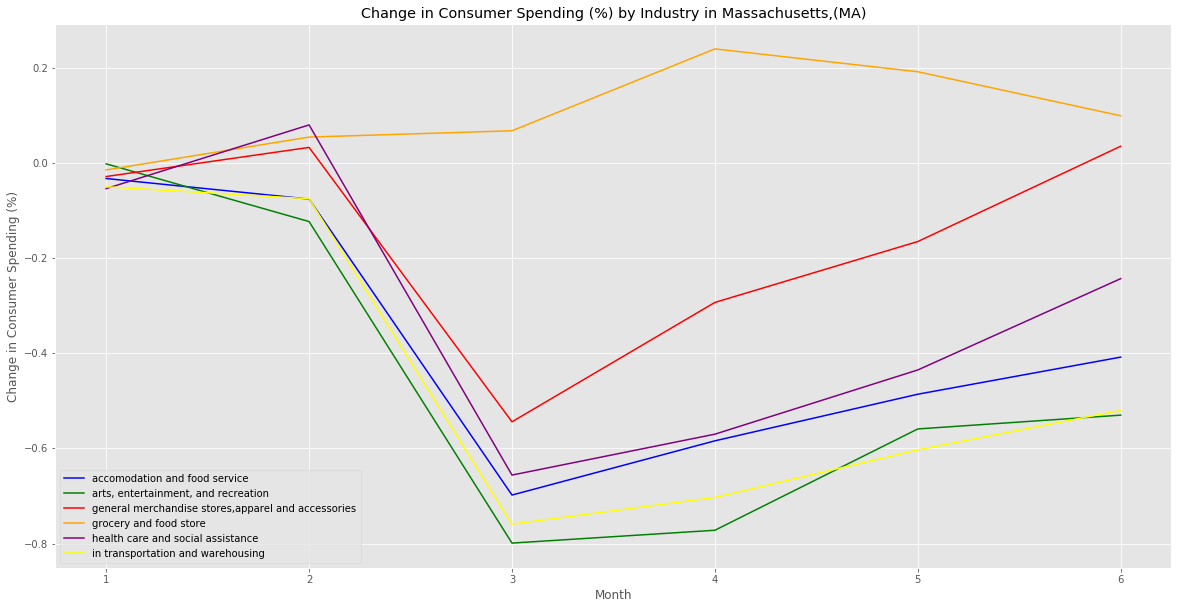

In [201]:
plt.figure(figsize=(20,10))
spend_acf, = plt.plot(MA["month"],MA["spend_acf"], color="blue", label="accomodation and food service" )
spend_aer, = plt.plot(MA["month"],MA["spend_aer"], color="green", label="arts, entertainment, and recreation " )
spend_apg, = plt.plot(MA["month"],MA["spend_apg"], color="red", label="general merchandise stores,apparel and accessories" )
spend_grf, = plt.plot(MA["month"],MA["spend_grf"], color="orange", label="grocery and food store" )
spend_hcs, = plt.plot(MA["month"],MA["spend_hcs"], color="purple", label="health care and social assistance" )
spend_tws, = plt.plot(MA["month"],MA["spend_tws"], color="yellow", label="in transportation and warehousing" )
# Create a legend for our chart
plt.legend(handles=[spend_acf, spend_aer, spend_apg,spend_grf,spend_hcs,spend_tws], loc="lower left")
plt.xlabel('Month')
# Set the y axis label of the current axis.
plt.ylabel('Change in Consumer Spending (%)')
# Set a title of the current axes.
plt.xticks(np.arange(min(eom_df["month"]), max(eom_df["month"])+1, 1.0))
plt.title('Change in Consumer Spending (%) by Industry in Massachusetts,(MA)')
# Show the chart
plt.show()

In [192]:
# Filter the data so that only those sightings in the RI are in a DataFrame
RI= eom_df.loc[eom_df.index == "RI", :]
RI.head()

,date,year,month,day,statefips,statename,case_rate,spend_acf,spend_aer,spend_apg,spend_grf,spend_hcs,spend_tws
stateabbrev,,,,,,,,,,,,,
RI,2020-01-31,2020,1,31,44,Rhode Island,0.0,-0.122,-0.123,0.0109,-0.0147,-0.1640,0.1710
RI,2020-02-28,2020,2,28,44,Rhode Island,0.0,-0.128,-0.214,-0.0924,0.0118,0.0284,-0.0397
RI,2020-03-31,2020,3,31,44,Rhode Island,46.1,-0.765,-0.776,-0.5540,0.0132,-0.8440,-0.6690
RI,2020-04-30,2020,4,30,44,Rhode Island,814.0,-0.706,-0.990,-0.3790,0.0212,-0.8490,-0.7430
RI,2020-05-31,2020,5,31,44,Rhode Island,1409.0,-0.621,-0.867,-0.1910,-0.0821,-0.4530,-0.6420


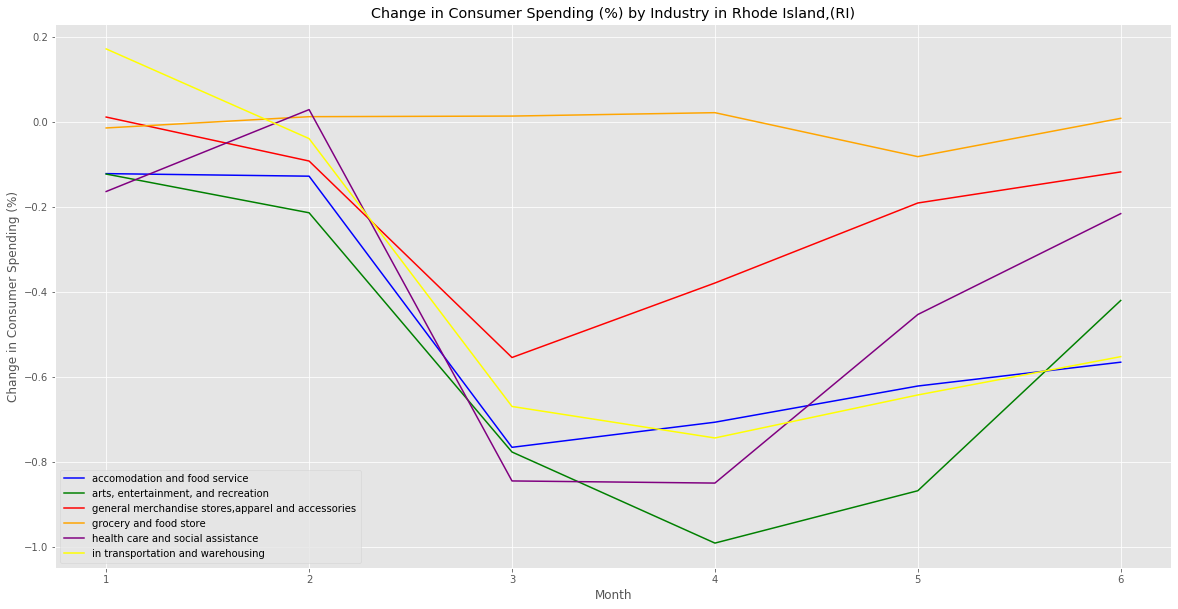

In [202]:
plt.figure(figsize=(20,10))
spend_acf, = plt.plot(RI["month"],RI["spend_acf"], color="blue", label="accomodation and food service" )
spend_aer, = plt.plot(RI["month"],RI["spend_aer"], color="green", label="arts, entertainment, and recreation " )
spend_apg, = plt.plot(RI["month"],RI["spend_apg"], color="red", label="general merchandise stores,apparel and accessories" )
spend_grf, = plt.plot(RI["month"],RI["spend_grf"], color="orange", label="grocery and food store" )
spend_hcs, = plt.plot(RI["month"],RI["spend_hcs"], color="purple", label="health care and social assistance" )
spend_tws, = plt.plot(RI["month"],RI["spend_tws"], color="yellow", label="in transportation and warehousing" )
# Create a legend for our chart
plt.legend(handles=[spend_acf, spend_aer, spend_apg,spend_grf,spend_hcs,spend_tws], loc="lower left")
plt.xlabel('Month')
# Set the y axis label of the current axis.
plt.ylabel('Change in Consumer Spending (%)')
# Set a title of the current axes.
plt.xticks(np.arange(min(eom_df["month"]), max(eom_df["month"])+1, 1.0))
plt.title('Change in Consumer Spending (%) by Industry in Rhode Island,(RI)')
# Show the chart
plt.show()

In [194]:
# Filter the data so that only those sightings in the DC are in a DataFrame
DC = eom_df.loc[eom_df.index == "DC", :]
DC.head()

,date,year,month,day,statefips,statename,case_rate,spend_acf,spend_aer,spend_apg,spend_grf,spend_hcs,spend_tws
stateabbrev,,,,,,,,,,,,,
DC,2020-01-31,2020,1,31,11,District Of Columbia,0.0,-0.0608,0.0113,-0.0147,-0.00464,0.0143,0.049
DC,2020-02-28,2020,2,28,11,District Of Columbia,0.0,-0.0445,-0.0530,-0.0168,0.09650,-0.1400,-0.210
DC,2020-03-31,2020,3,31,11,District Of Columbia,70.1,-0.7580,-0.7270,-0.4420,0.28800,-0.5530,-0.834
DC,2020-04-30,2020,4,30,11,District Of Columbia,613.0,-0.7380,-0.8130,-0.3460,0.25400,-0.5240,-0.843
DC,2020-05-31,2020,5,31,11,District Of Columbia,1247.0,-0.6660,-0.7020,-0.2860,0.18900,-0.2830,-0.768


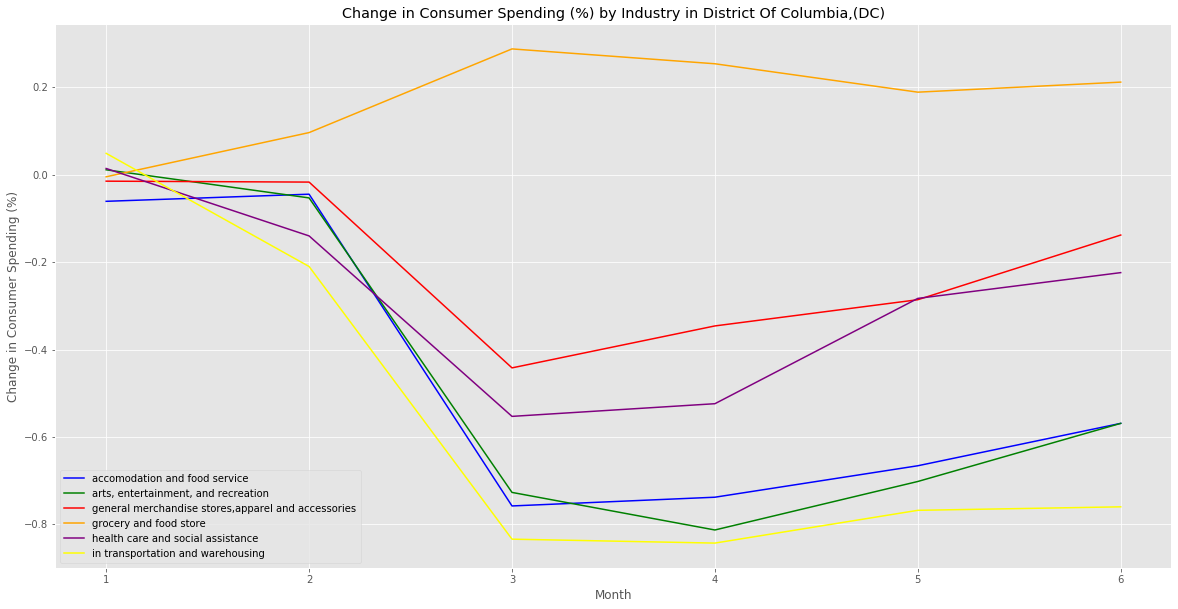

In [203]:
plt.figure(figsize=(20,10))
spend_acf, = plt.plot(DC["month"],DC["spend_acf"], color="blue", label="accomodation and food service" )
spend_aer, = plt.plot(DC["month"],DC["spend_aer"], color="green", label="arts, entertainment, and recreation " )
spend_apg, = plt.plot(DC["month"],DC["spend_apg"], color="red", label="general merchandise stores,apparel and accessories" )
spend_grf, = plt.plot(DC["month"],DC["spend_grf"], color="orange", label="grocery and food store" )
spend_hcs, = plt.plot(DC["month"],DC["spend_hcs"], color="purple", label="health care and social assistance" )
spend_tws, = plt.plot(DC["month"],DC["spend_tws"], color="yellow", label="in transportation and warehousing" )
# Create a legend for our chart
plt.legend(handles=[spend_acf, spend_aer, spend_apg,spend_grf,spend_hcs,spend_tws], loc="lower left")
plt.xlabel('Month')
# Set the y axis label of the current axis.
plt.ylabel('Change in Consumer Spending (%)')
# Set a title of the current axes.
plt.xticks(np.arange(min(eom_df["month"]), max(eom_df["month"])+1, 1.0))
plt.title('Change in Consumer Spending (%) by Industry in District Of Columbia,(DC)')
# Show the chart
plt.show()

In [196]:
FL = eom_df.loc[eom_df.index == "FL", :]
FL.head()

,date,year,month,day,statefips,statename,case_rate,spend_acf,spend_aer,spend_apg,spend_grf,spend_hcs,spend_tws
stateabbrev,,,,,,,,,,,,,
FL,2020-01-31,2020,1,31,12,Florida,0.0,0.014,0.0323,0.0220,0.01750,-0.0123,-0.0305
FL,2020-02-28,2020,2,28,12,Florida,0.0,-0.039,-0.1050,-0.0199,-0.00225,-0.0296,-0.1370
FL,2020-03-31,2020,3,31,12,Florida,31.4,-0.622,-0.7220,-0.4820,0.07690,-0.5700,-0.6600
FL,2020-04-30,2020,4,30,12,Florida,157.0,-0.515,-0.7010,-0.3250,0.20300,-0.4750,-0.6470
FL,2020-05-31,2020,5,31,12,Florida,261.0,-0.296,-0.5010,-0.0560,0.05600,-0.1060,-0.5290


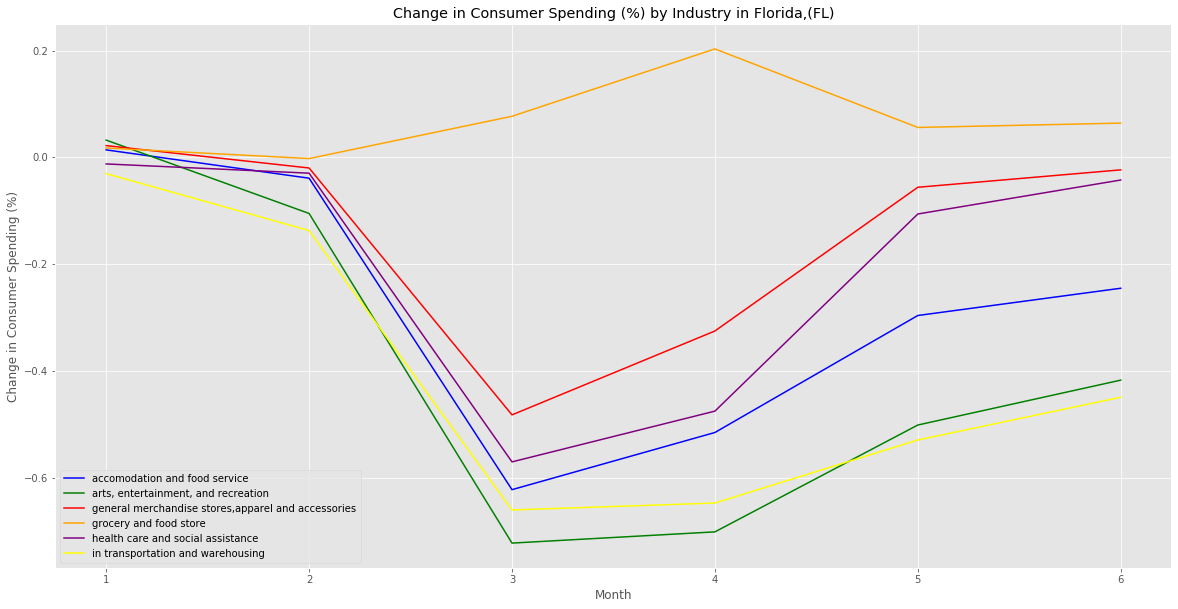

In [204]:
plt.figure(figsize=(20,10))
spend_acf, = plt.plot(FL["month"],FL["spend_acf"], color="blue", label="accomodation and food service" )
spend_aer, = plt.plot(FL["month"],FL["spend_aer"], color="green", label="arts, entertainment, and recreation " )
spend_apg, = plt.plot(FL["month"],FL["spend_apg"], color="red", label="general merchandise stores,apparel and accessories" )
spend_grf, = plt.plot(FL["month"],FL["spend_grf"], color="orange", label="grocery and food store" )
spend_hcs, = plt.plot(FL["month"],FL["spend_hcs"], color="purple", label="health care and social assistance" )
spend_tws, = plt.plot(FL["month"],FL["spend_tws"], color="yellow", label="in transportation and warehousing" )
# Create a legend for our chart
plt.legend(handles=[spend_acf, spend_aer, spend_apg,spend_grf,spend_hcs,spend_tws], loc="lower left")
plt.xlabel('Month')
# Set the y axis label of the current axis.
plt.ylabel('Change in Consumer Spending (%)')
# Set a title of the current axes.
plt.xticks(np.arange(min(eom_df["month"]), max(eom_df["month"])+1, 1.0))
plt.title('Change in Consumer Spending (%) by Industry in Florida,(FL)')
# Show the chart
plt.show()